# 0.1 Imports

In [407]:
import pandas  as pd
import seaborn as sns
import numpy   as np
import scikitplot as skplt

import matplotlib.pyplot         as plt

from sklearn import linear_model as lm
from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from IPython.core.display import HTML 

# 0.2 Helper Functions

In [260]:
def jupyter_settings(): 
    %matplotlib inline 
    #%matplotlib notebook
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
     
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option ('display.expand_frame_repr', False)
    
    sns.set()

In [261]:
%matplotlib inline 
%matplotlib notebook

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24


display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option ('display.expand_frame_repr', False)

sns.set()

In [262]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1.0 Data Description

## 1.1 Loading data

In [263]:
df1= pd.read_csv ('/Users/adriele/Documents/repos/pa004/dataset/data.csv')

### 1.1.1 Rename columns

In [264]:
# Dropping Unnamed column
df1.columns = ['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
               'driving_license', 'vehicle_age', 'vehicle_damage',
               'previously_insured', 'annual_premium', 'vintage', 'response']



## 1.2 Data Dimensions

In [265]:
print( 'Number of Cols {}'.format( df1.shape[1] ) )
print( 'Number of Rows {}'.format( df1.shape[0] ) )

Number of Cols 12
Number of Rows 131948


## 1.3 Check NA

In [266]:
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 1.4 Check Data Types

In [267]:
df1.dtypes

id                       int64
gender                  object
age                      int64
region_code              int64
policy_sales_channel     int64
driving_license          int64
vehicle_age             object
vehicle_damage          object
previously_insured       int64
annual_premium           int64
vintage                  int64
response                 int64
dtype: object

## 1.5 Descriptive Startistical 

In [268]:
num_attributes = df1.select_dtypes ( include = ['int64', 'float64'] )
cat_attributes = df1.select_dtypes ( exclude = ['int64', 'float64'] )

### 1.5.1 Numerical Atributes

In [269]:

# Central tedency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply ( np.median ) ).T

# Dispersin - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min () )).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew () )).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis () ) ).T

n = pd.concat([ d2, d3, d4, ct1, ct2, d1, d5, d6 ]).T.reset_index()
n.columns = [ 'atributtes', 'min', 'max', 'range', 'mean', 'median','std', 'skew', 'kurtosis' ]
n

,atributtes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.0,131947.0,131947.0,65973.500000,65973.5,38090.106658,0.000000,-1.200000
1,age,45.0,85.0,40.0,56.939635,55.0,9.469115,0.640036,-0.649460
2,region_code,0.0,52.0,52.0,26.985388,28.0,12.310347,-0.209233,-0.407361
3,policy_sales_channel,1.0,163.0,162.0,74.217237,30.0,53.440006,0.200884,-1.768637
4,driving_license,0.0,1.0,1.0,0.994096,1.0,0.076609,-12.899263,164.393472
5,previously_insured,0.0,1.0,1.0,0.313427,0.0,0.463886,0.804403,-1.352957
6,annual_premium,2630.0,540165.0,537535.0,32301.524040,34034.5,19160.604775,1.920845,36.133813
7,vintage,10.0,299.0,289.0,154.276010,154.0,83.644379,0.001730,-1.201913
8,response,0.0,1.0,1.0,0.159517,0.0,0.366158,1.859780,1.458803


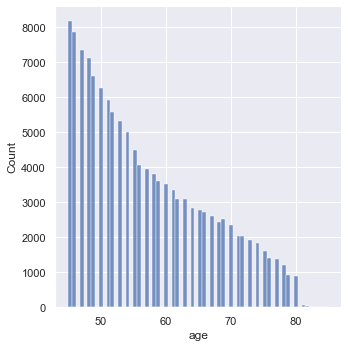

In [270]:
sns.displot( df1['age'])

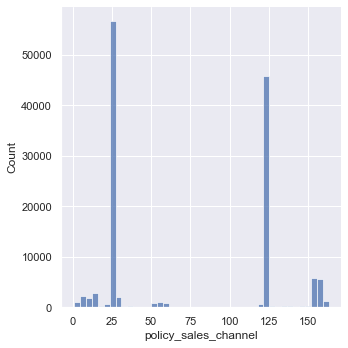

In [298]:
sns.displot( df1['policy_sales_channel'])

### 1.5.2 Attributes Category

In [272]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

<AxesSubplot:xlabel='vehicle_damage', ylabel='annual_premium'>

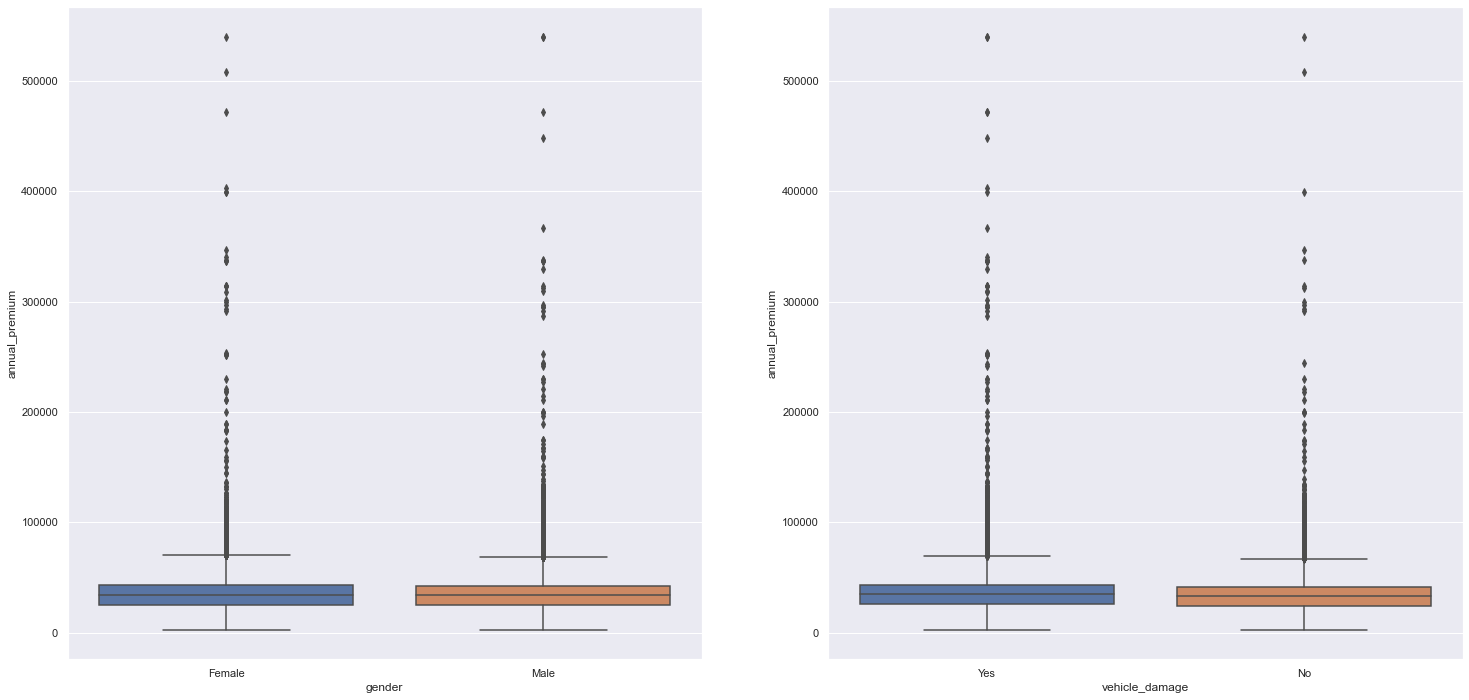

In [273]:
aux1 = df1[( df1[ 'gender' ] != '0') & (df1[ 'annual_premium' ] >0 )]

plt.subplot (1, 2, 1)
sns.boxplot (x = 'gender', y='annual_premium', data = aux1)

plt.subplot (1, 2, 2)
sns.boxplot (x = 'vehicle_damage', y='annual_premium', data = aux1)

# 2.0 Feature Engeneering - Mind Map

In [345]:
df2 = df1.copy()

# Vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply( lambda x: 'over_2_years' 
                                              if x == '> 2 Years' else 'betwenn_1_2_years' 
                                              if x == '1-2 Year' else 'below_1_year')

# Vehicle demage
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x == 'yes' else 0)

## 2.1 Mind Map

## 2.2 Hypothesy List


- H1. Female customers old would be more  insterested than male customers.
- H2. Customers over 50 years old would be insterested.
- H3. Customers around downtown would be insterested.
- H4. Policy Sales 
- H5. Customers with drive licenses would be insterested.
- H6. Customers with new car be insterested.
- H7. Customers demage car would be insterested.
- H8 . Previously Insured
- H9. Customers that paid for annually premmiun less than 40.000 would be insterested.
- H10. Customers with more time of association on Health Insurance would be insterested.

# 3.0 FILTERING VARIABLES

In [347]:
df3 = df2.copy()

# 4.0 Exploratory Data Analysis

In [348]:
df4 = df3.copy()

## 4.1 Univariate Analysis

### 4.1.1 Response variable

/Users/adriele/opt/anaconda3/envs/env_pa004/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='response', ylabel='Density'>

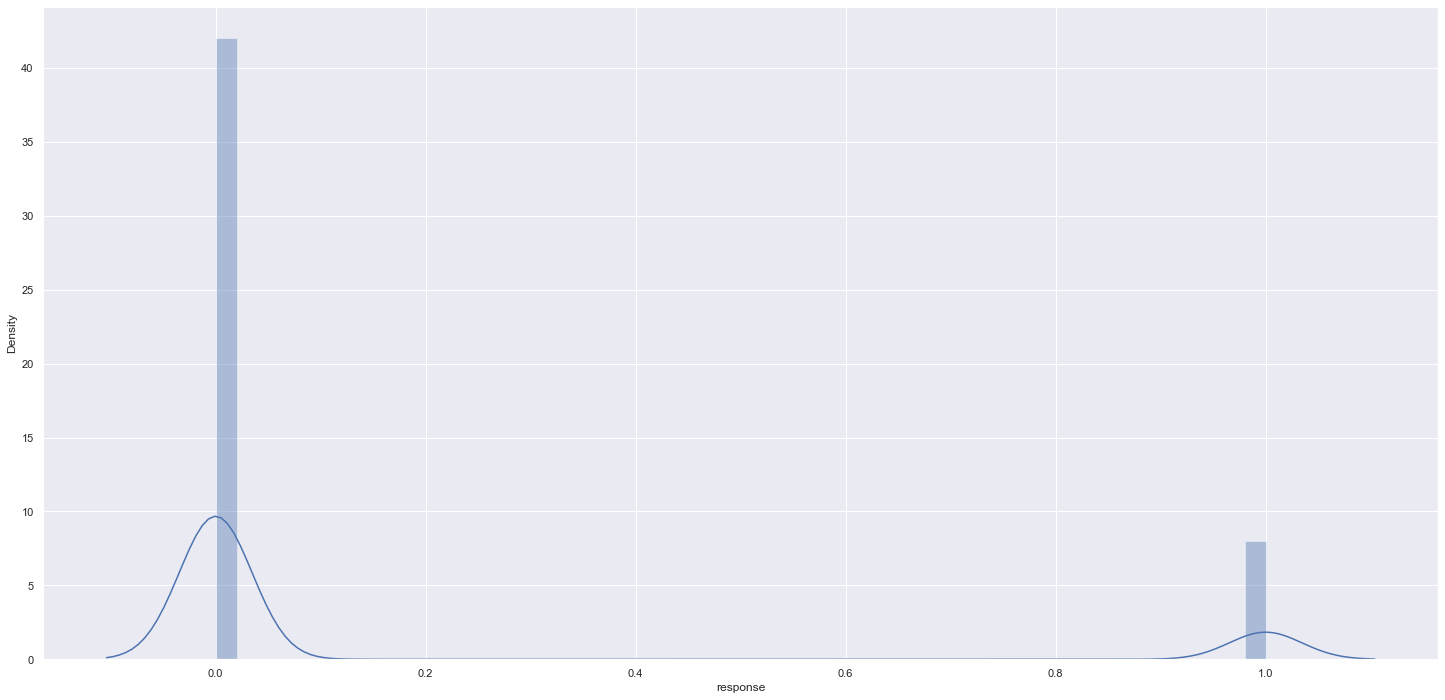

In [349]:
sns.distplot (df4['response'])

### 4.1.2 Numerical Variable

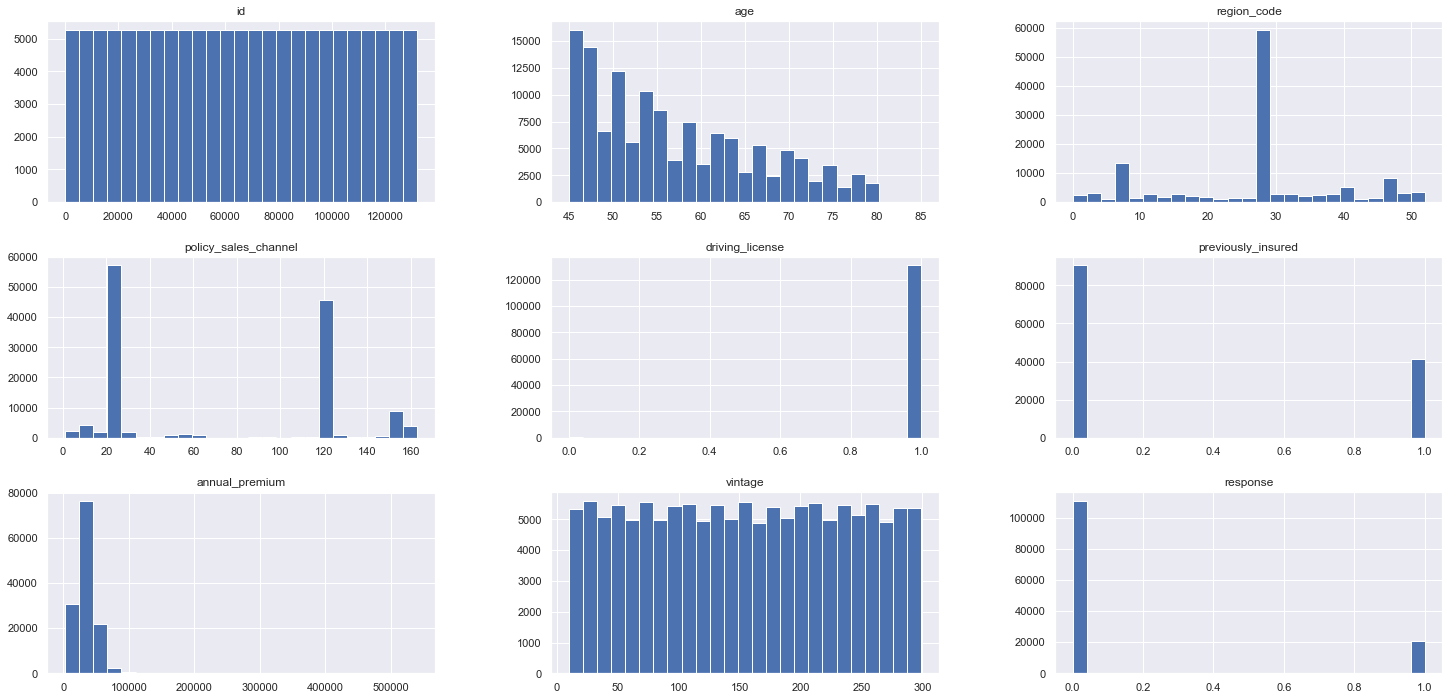

In [350]:
num_attributes.hist(bins =25);

### 4.1.3 Categorical Variable

In [351]:
cat_attributes.columns

Index(['gender', 'vehicle_age', 'vehicle_damage'], dtype='object')

/Users/adriele/opt/anaconda3/envs/env_pa004/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

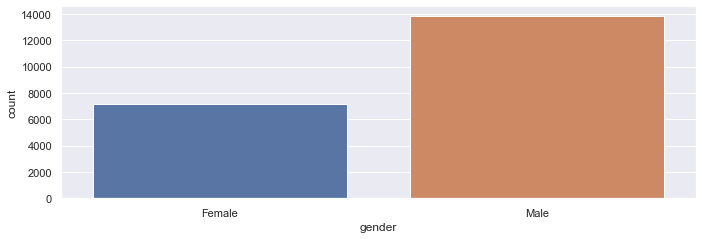

In [352]:
# Gender 
plt.subplot(3, 2, 1)
a = df4.loc[df4['response'] == 1, 'gender']
sns.countplot(a)

# plt.subplot(3, 2, 2)
# sns.kdeplot( a, label='a', shade=True)

# plt.subplot(3, 2, 3)
# sns.kdeplot(df4[df4['vehicle_damage'] == 'yes']['response'], label='a', shade=True)



## 4.2 Bivariate Analysis - Hipothesys Validatin

### <font color='orange'> 4.2.1- H1. Female customers old would be more  insterested than male customers.
    
   <font color='green'> True

/Users/adriele/opt/anaconda3/envs/env_pa004/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='response'>

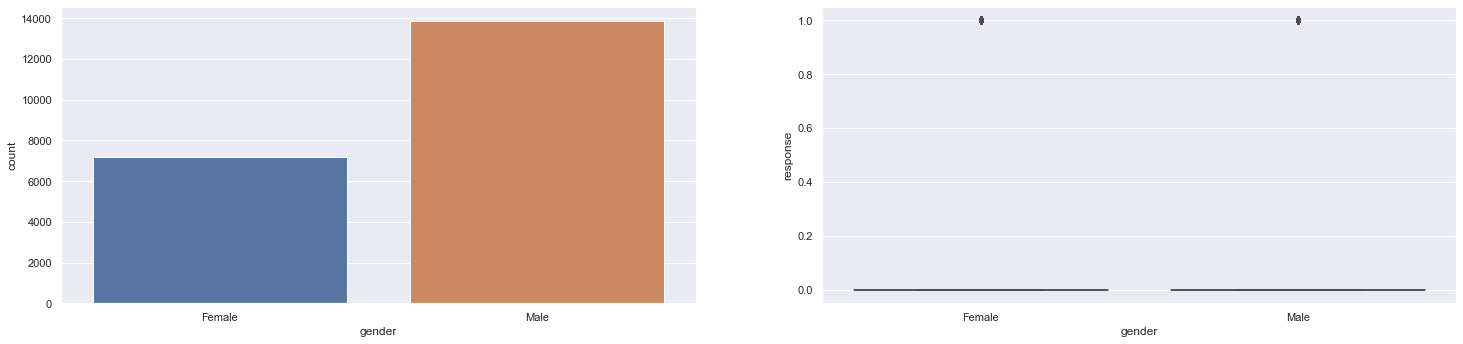

In [353]:
plt.subplot(2, 2, 1)
h1 = df4.loc[df4['response'] == 1, 'gender']
sns.countplot(h1)


plt.subplot(2, 2, 2)
sns.boxplot( x='gender', y='response', data=df4)


### <font color='orange'>  4.2.2- H2. Customers over 50 years old would be insterested.

    
<font color='red'> False

<AxesSubplot:xlabel='age', ylabel='Count'>

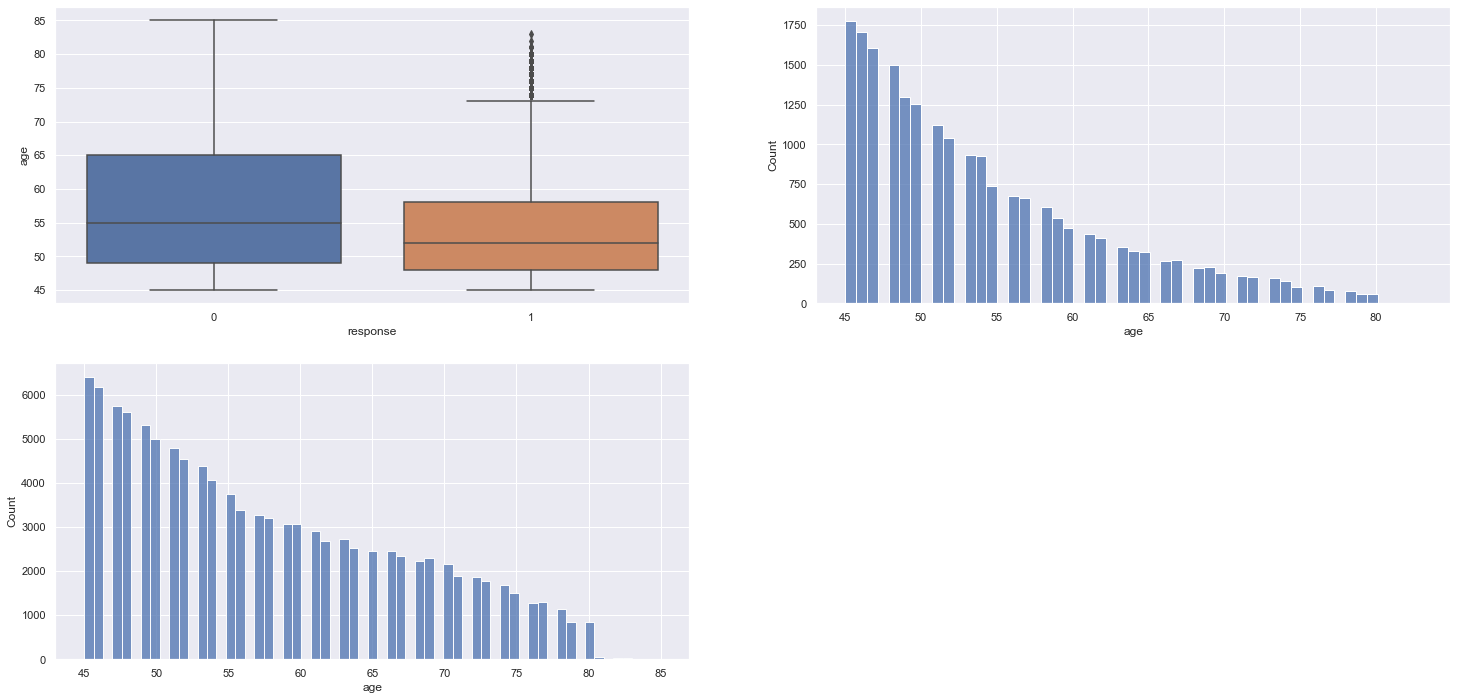

In [354]:
plt.subplot(2, 2, 1)
sns.boxplot( x='response', y='age', data=df4)

plt.subplot(2, 2, 2)
h2 = df4.loc[df4['response'] == 1, 'age']
sns.histplot( h2 )

plt.subplot(2, 2, 3)
h2_aux = df4.loc[df4['response'] == 0, 'age']
sns.histplot( h2_aux )

### <font color='orange'>  4.2.3 - H3. Region Code.
<font color='blue'>    No Data

<AxesSubplot:xlabel='region_code', ylabel='id'>

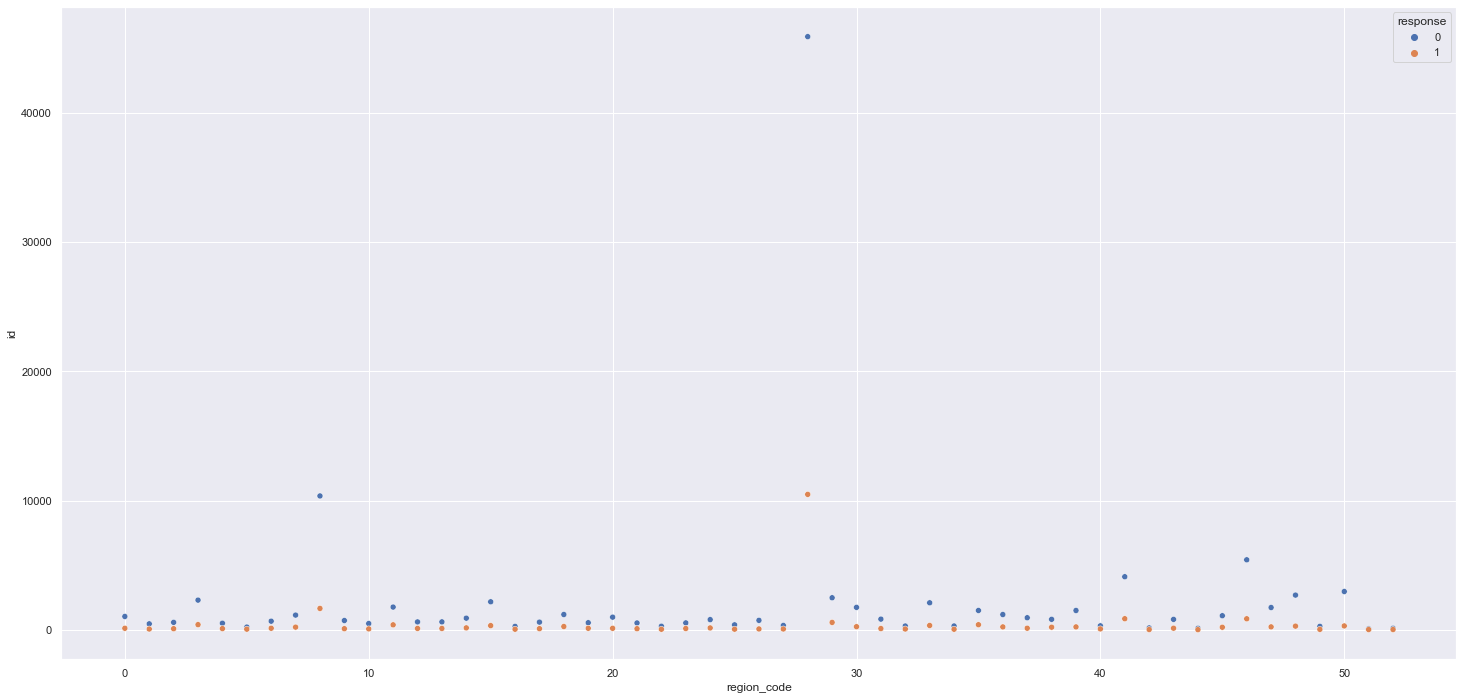

In [355]:
h3 = df4[['id', 'region_code', 'response']].groupby( ['region_code', 'response'] ).count().reset_index() 
sns.scatterplot(x='region_code', y='id', hue='response', data=h3)

### <font color='orange'>  4.2.4- H4. Policy Sales
<font color='blue'>  No data    

<AxesSubplot:xlabel='response', ylabel='policy_sales_channel'>

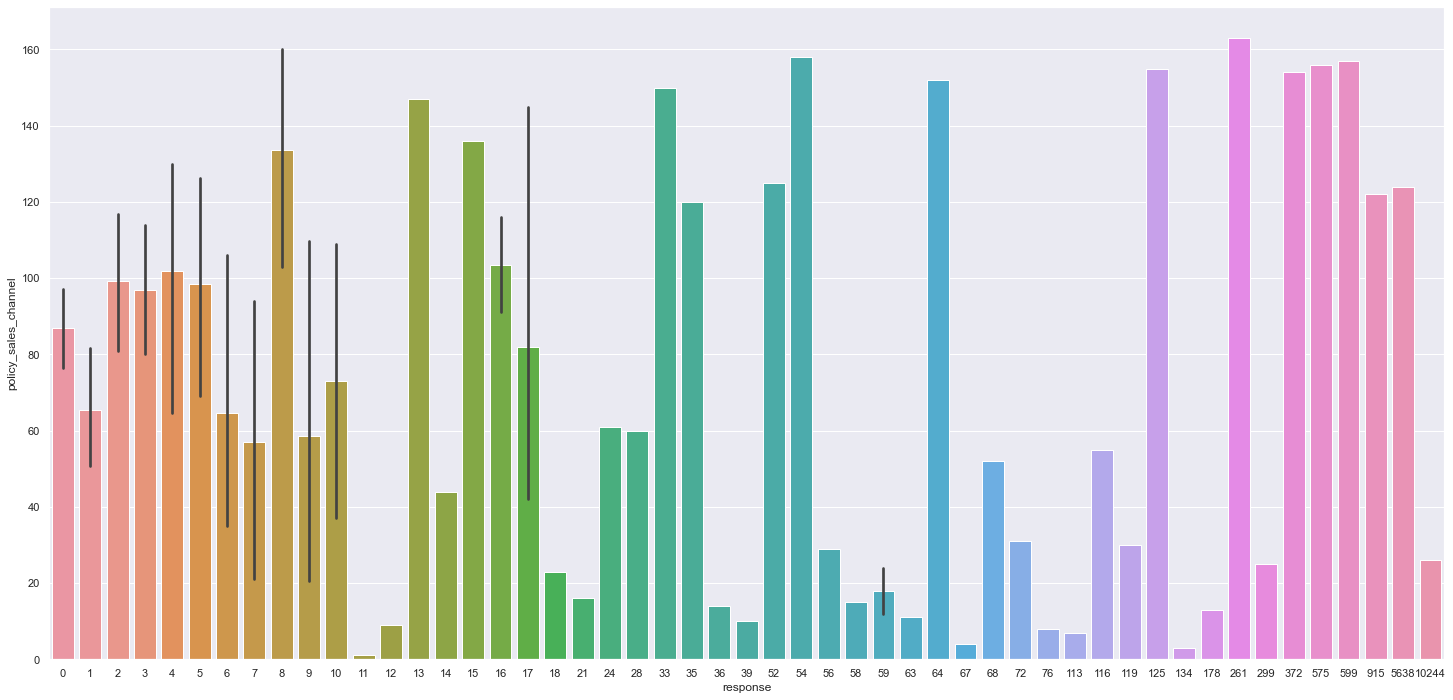

In [356]:
h4 = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot( x='response', y='policy_sales_channel', data= h4)

### <font color='orange'>  4.2.5 - H5. Customers with drive licenses would be insterested.
<font color='red'> False    

<AxesSubplot:xlabel='response', ylabel='driving_license'>

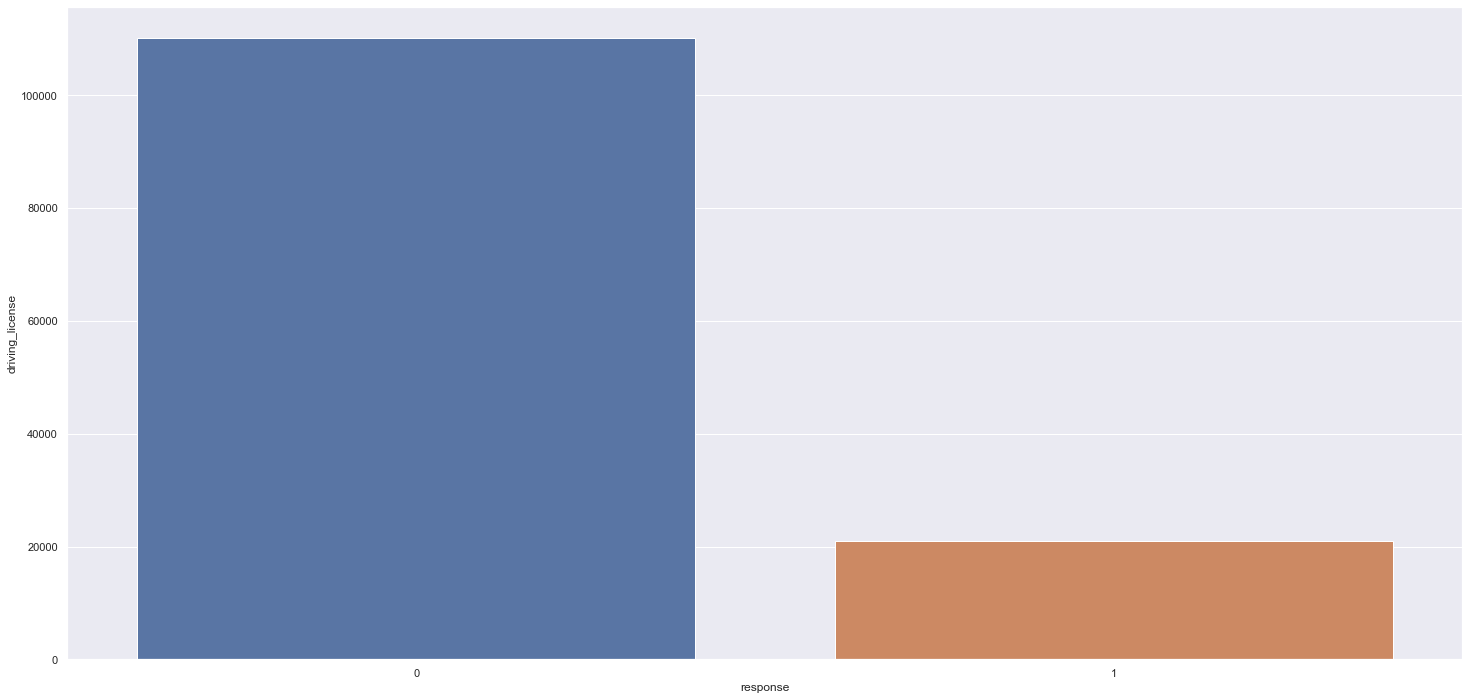

In [357]:
h5 = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
sns.barplot( x='response', y='driving_license', data=h5 )

In [358]:
h5.head()

,response,driving_license
0,0,110160
1,1,21009


In [359]:
h5['driving_license_perc'] = h5['driving_license'] / h5['driving_license'].sum()
h5.head()

,response,driving_license,driving_license_perc
0,0,110160,0.839833
1,1,21009,0.160167


### <font color='orange'>  4.2.6 - H6. Customers with new car be insterested.
<font color='red'>    False

In [360]:
h6 = df4[['vehicle_age', 'response']].value_counts( normalize=True ).reset_index()
h6

,vehicle_age,response,0
0,betwenn_1_2_years,0,0.766643
1,betwenn_1_2_years,1,0.130385
2,over_2_years,0,0.070869
3,over_2_years,1,0.028428
4,below_1_year,0,0.002971
5,below_1_year,1,0.000705


<AxesSubplot:xlabel='vehicle_age', ylabel='response'>

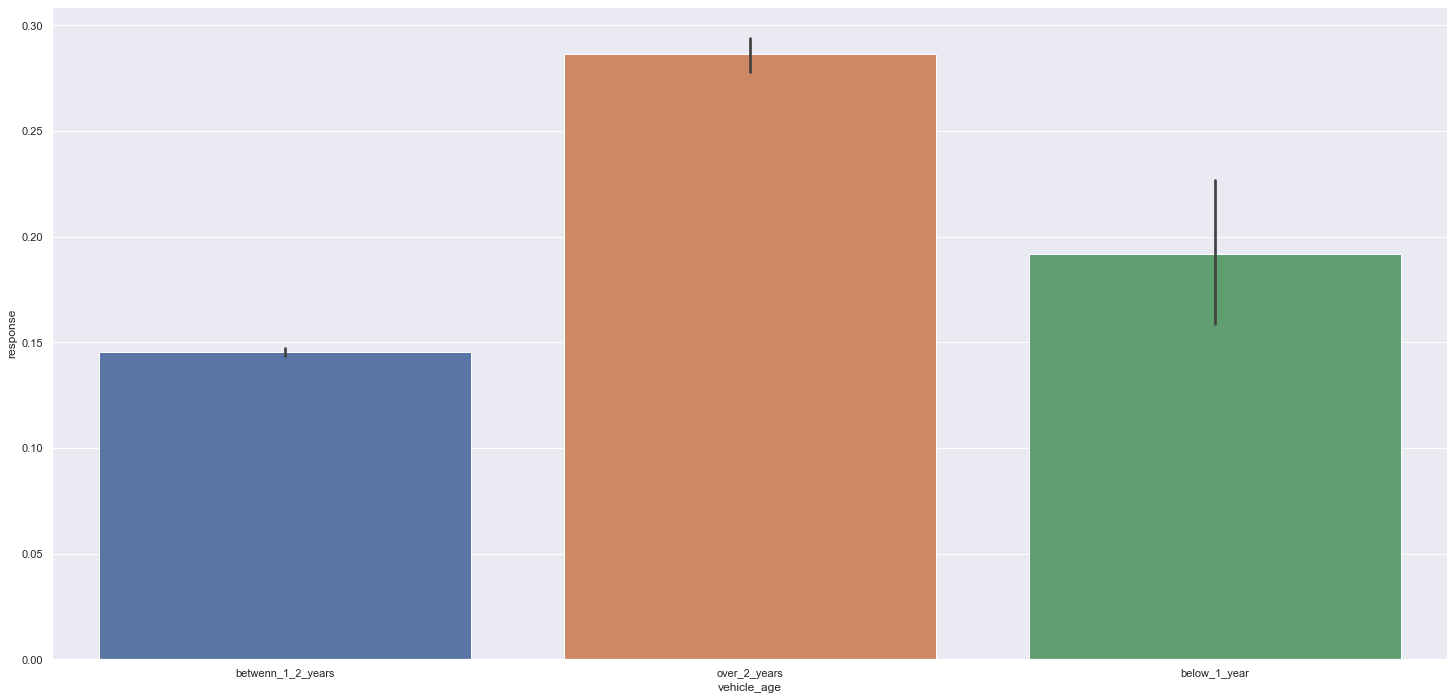

In [361]:
sns.barplot(x='vehicle_age', y='response', data=df4)

/Users/adriele/opt/anaconda3/envs/env_pa004/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_age', ylabel='count'>

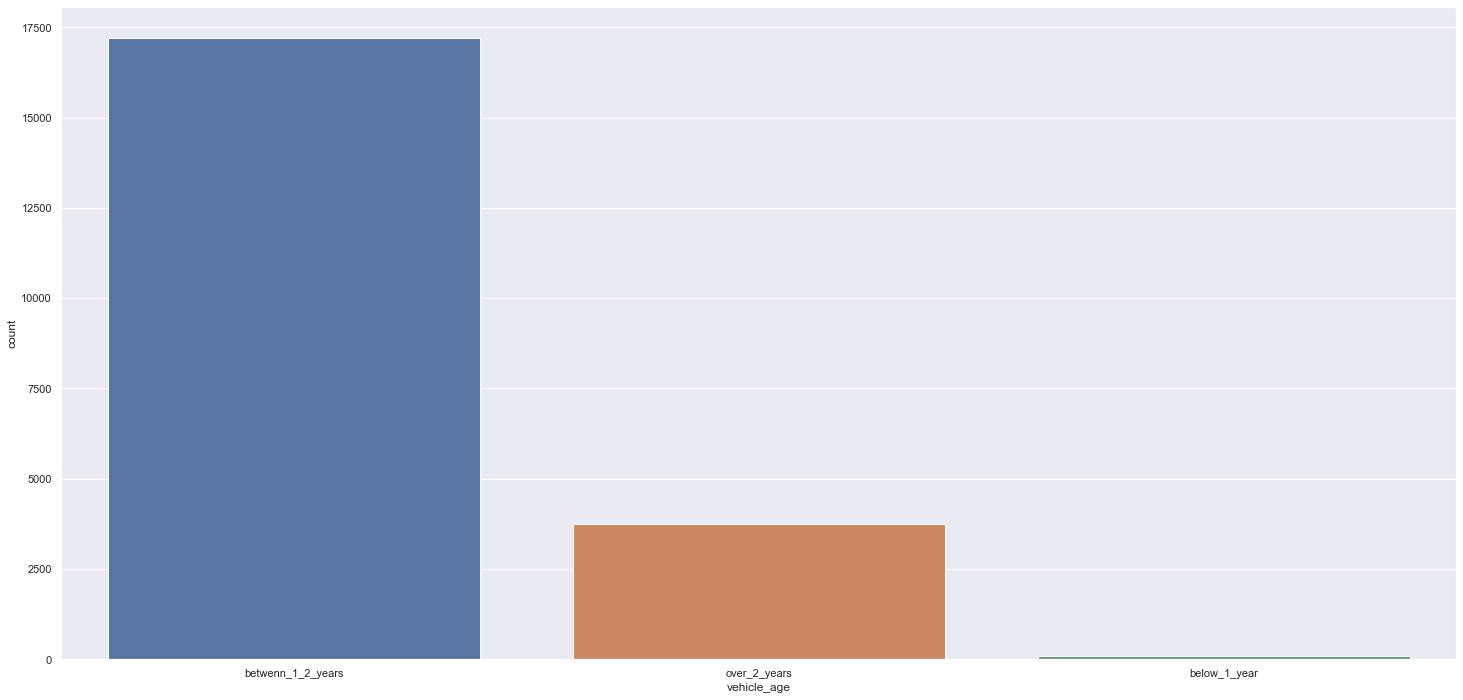

In [362]:

h = df4.loc[df4['response'] == 1, 'vehicle_age']
sns.countplot(h)

<AxesSubplot:xlabel='vehicle_age', ylabel='Count'>

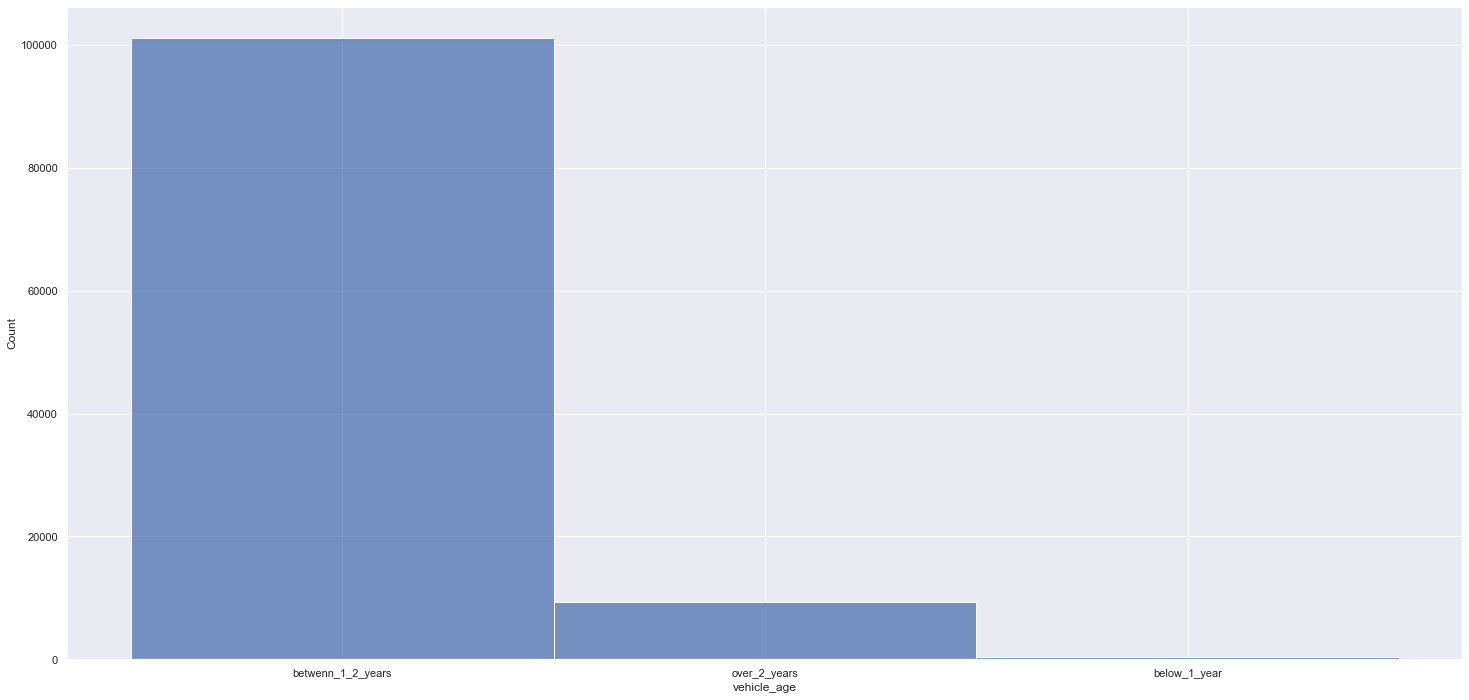

In [363]:
h = df4.loc[df4['response'] == 0, 'vehicle_age']
sns.histplot(h)

### <font color='orange'>  4.2.7 - H7. Customers demage car would be insterested.

In [364]:
df4.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,0,Female,56,28,26,1,betwenn_1_2_years,0,0,32031,72,1
1,1,Female,47,35,124,1,betwenn_1_2_years,0,0,47576,46,1
2,2,Male,45,8,124,1,betwenn_1_2_years,0,0,42297,264,0
3,3,Female,54,28,122,1,betwenn_1_2_years,0,0,38560,184,0
4,4,Female,49,3,152,1,betwenn_1_2_years,0,1,25553,130,0


### <font color='orange'>  4.2.8 - H8. Previously Insured
<font color='blue'>    Not Answered

In [365]:
pd.crosstab( df4['previously_insured'], df4['response'] ).apply( lambda x: x / x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.768037,0.231963
1,0.999178,0.000822


### <font color='orange'>  4.2.9 - H9. Customers that paid for annually premmiun less than 40.000 would be insterested.
    
<font color='green'> True

In [366]:
df3['annual_premium'].max()


540165

In [367]:
df3['annual_premium'].min()

2630

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

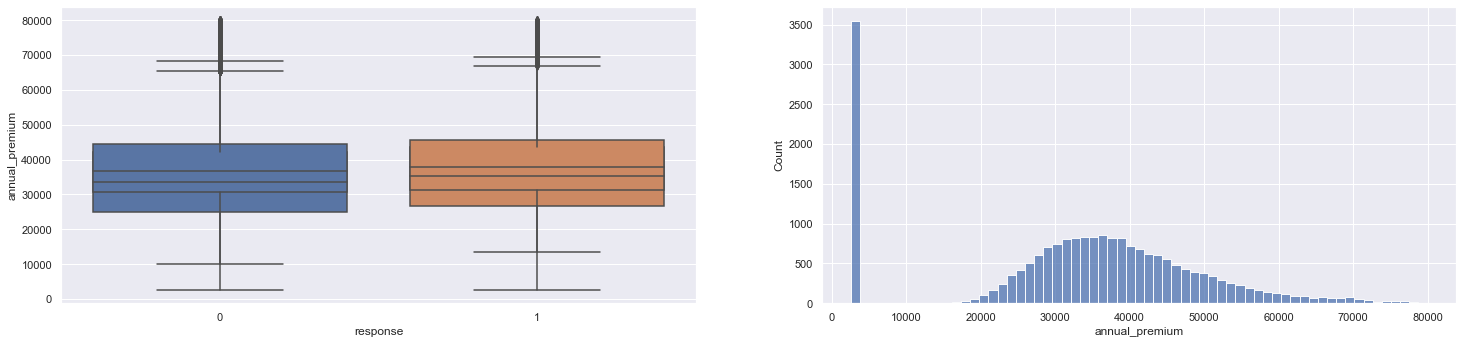

In [376]:

plt.subplot(2, 2, 1)
h9 = df4[df4['annual_premium'] < 80000]
sns.boxplot( x='response', y='annual_premium', data=h9 )

plt.subplot(2, 2, 2)
h9_aux = h9.loc[h9['response'] == 1, 'annual_premium' ]
sns.histplot(h9_aux )

plt.subplot(2, 2, 1)
h9 = df4[(df4['annual_premium'] > 2630) & (df4['annual_premium'] < 80000)]
sns.boxplot( x='response', y='annual_premium', data=h9 )

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

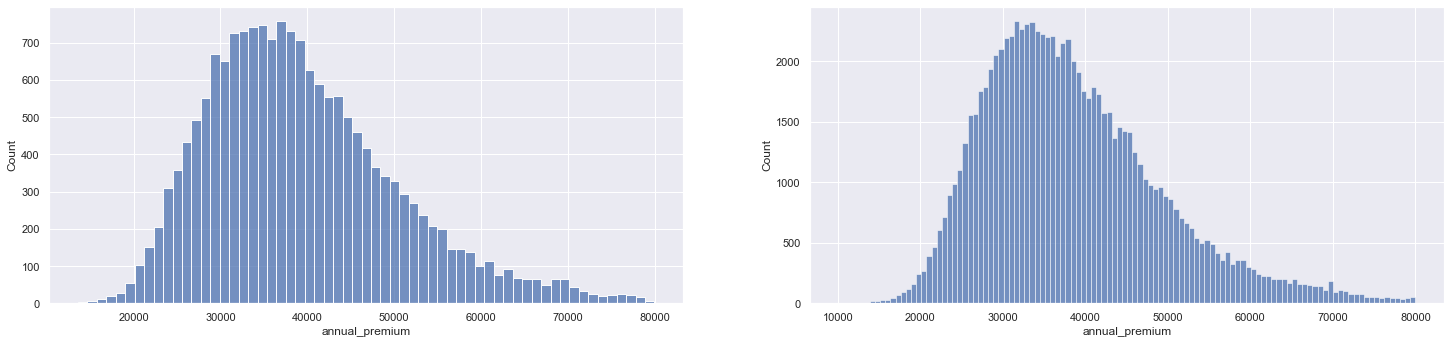

In [377]:
plt.subplot(2, 2, 1)
h9_aux1 = df4[(df4['annual_premium'] > 2630) & (df4['annual_premium'] < 80000)]
h9_aux2 = h9_aux1.loc[h9['response'] == 1, 'annual_premium' ]                                                                                          
sns.histplot( h9_aux2 )

plt.subplot(2, 2, 2)
h9_aux1 = df4[(df4['annual_premium'] > 2630) & (df4['annual_premium'] < 80000)]
h9_aux2 = h9_aux1.loc[h9['response'] == 0, 'annual_premium' ]                                                                                          
sns.histplot( h9_aux2 )

### <font color='orange'>  4.2.10 - H10. Customers with more time of association on Health Insurance would be insterested.
<font color='blue'> Same Comportatment    

<AxesSubplot:xlabel='vintage', ylabel='Count'>

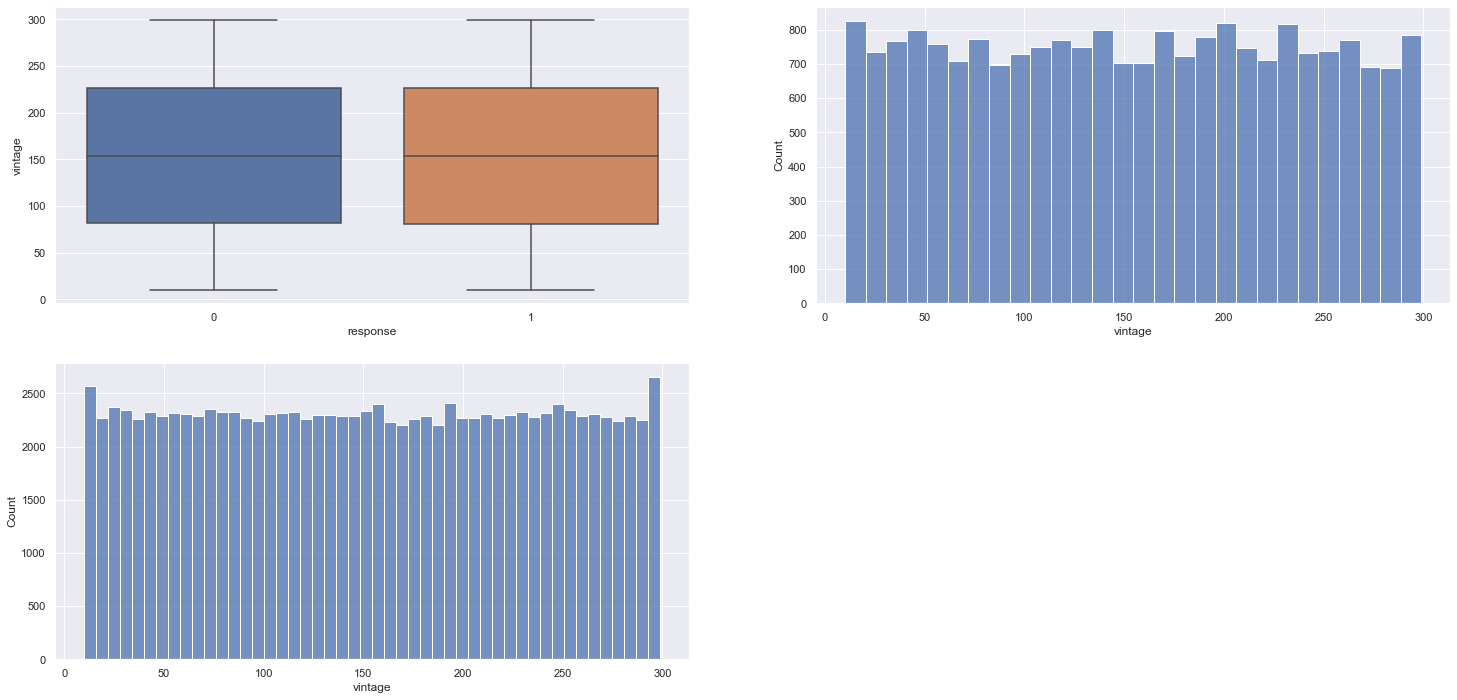

In [378]:
plt.subplot(2, 2, 1)
sns.boxplot( x='response', y='vintage', data=df4)

plt.subplot(2, 2, 2)
h10 = df4.loc[df4['response'] == 1, 'vintage']
sns.histplot( h10 )

plt.subplot(2, 2, 3)
h10 = df4.loc[df4['response'] == 0, 'vintage']
sns.histplot( h10 )

## 4.3 Multivariate Analysis

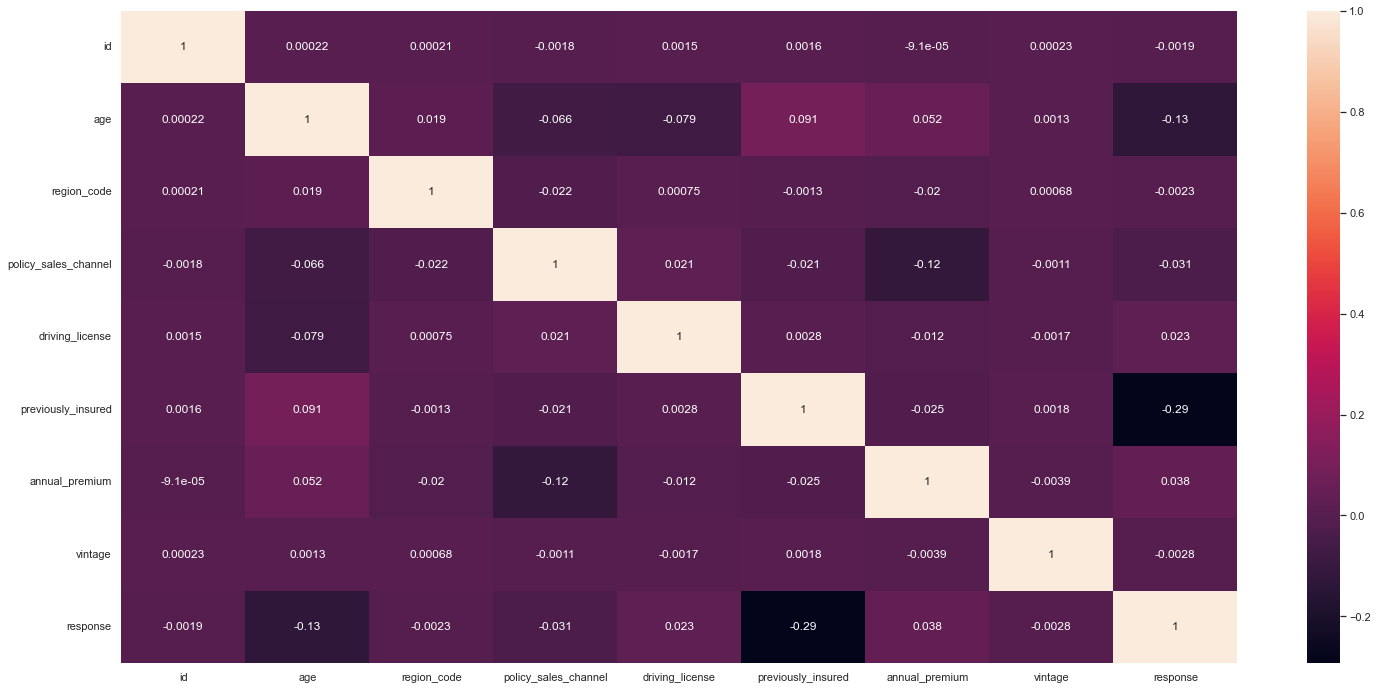

In [379]:
correlation = num_attributes.corr (method = 'pearson')
sns.heatmap (correlation, annot = True);

# 5.0 Data Preparation

In [380]:
df5 = df4.copy()

In [381]:
x = df4.drop( 'response', axis=1 )
y = df4['response'].copy()

x_train, x_validation, y_train, y_val = ms.train_test_split( x, y, test_size=0.20 )
df5 = pd.concat( [x_train, y_train], axis=1 )

## 5.1 Standarlization

In [382]:
ss = pp.StandardScaler()

# Annual Premium
df5['annual_premium'] = ss.fit_transform( df5[[ 'annual_premium']].values)

## 5.2 Rescaling

In [383]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# age
df5['age'] = mms_age.fit_transform(df5[['age']].values)

# Vintage
df5['vintage'] = mms_vintage.fit_transform( df5[['vintage']].values)

## 5.3 Encolding

In [384]:
# Region Code
target_encode_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map( target_encode_region_code )

# gender
target_encode_region_gender = df5.groupby('gender')['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map( target_encode_region_gender )

# vehicle_age
df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

# policy_sales_channel
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len(df5)
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( fe_policy_sales_channel )

## 5.4 Validation Preparation

In [385]:
#gender
x_validation.loc[:, 'gender'] = x_validation['gender'].map( target_encode_region_gender )

# region code
x_validation.loc[:, 'region_code'] = df5['region_code'].map( target_encode_region_code )

# age
x_validation.loc[:, 'age'] = mms_age.transform(x_validation[['age']].values)

# vehicle_age
x_validation = pd.get_dummies( x_validation, prefix='vehicle_age', columns=['vehicle_age'] )

# Annual Premium
x_validation.loc[:, 'annual_premium'] = ss.transform( x_validation[[ 'annual_premium']].values)

# policy_sales_channel
x_validation.loc[:, 'policy_sales_channel'] = x_validation['policy_sales_channel'].map( fe_policy_sales_channel )

# Vintage
x_validation.loc[:, 'vintage'] = mms_vintage.transform( x_validation[['vintage']].values)

# fill NA
x_validation = x_validation.fillna( 0 )


# 6.0 Feature Selection

In [421]:
df6 = df5.copy()

## 6.2 Feature Definition

In [394]:
# model definition
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1)

# data preparation
x_train_n = df5.drop( ['id', 'response'], axis=1 )
y_train_n = y_train.values
forest.fit( x_train_n, y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature Ranking:
                         feature  importance
0                        vintage    0.311064
0                 annual_premium    0.281904
0                            age    0.146921
0                    region_code    0.109112
0             previously_insured    0.079372
0           policy_sales_channel    0.054307
0                         gender    0.006086
0       vehicle_age_over_2_years    0.004962
0  vehicle_age_betwenn_1_2_years    0.004675
0                driving_license    0.000931
0       vehicle_age_below_1_year    0.000666
0                 vehicle_damage    0.000000


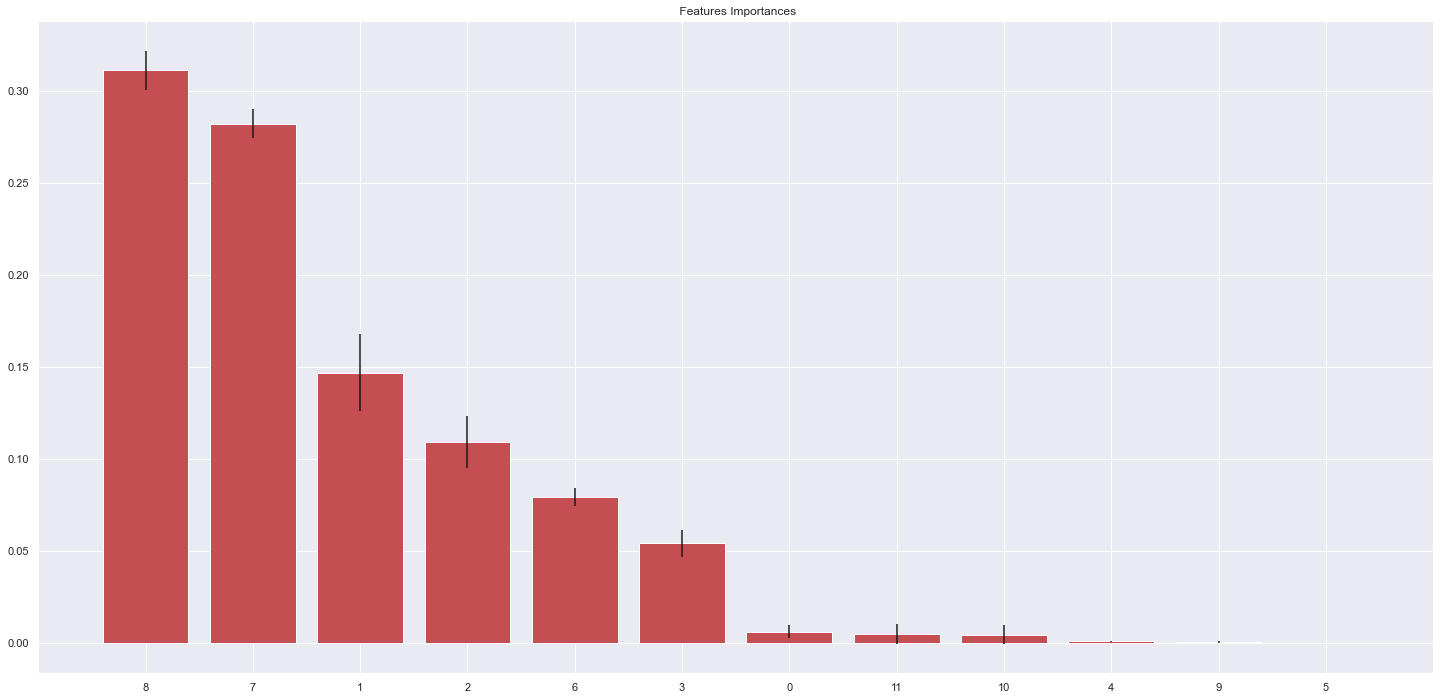

In [395]:
importances = forest.feature_importances_
std         = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices     = np.argsort(importances) [::-1]

# Print Features Rankings
print( 'Feature Ranking:')
df = pd.DataFrame()
for i, j in zip( x_train_n, forest.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance' : j}, index=[0])
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )   


# Plot the impurity based importances of the forest
plt.figure()
plt.title(" Features Importances")
plt.bar( range( x_train_n.shape[1] ), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks( range( x_train_n.shape[1] ), indices )
plt.xlim( [-1, x_train_n.shape[1]] )
plt.show()    

# 7.0 Machine Learning

In [423]:
cols_selected = ['vintage','annual_premium', 'age', 'region_code', 'previously_insured', 'policy_sales_channel', 'gender']   
x_train = df5[ cols_selected ]
x_validation = x_validation[ cols_selected]

## 7.1 KNN

In [424]:
# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=2 )

# model training
knn_model.fit( x_train, y_train )

# model prediction - the power of model; generalization
yhat_knn = knn_model.predict_proba( x_validation )

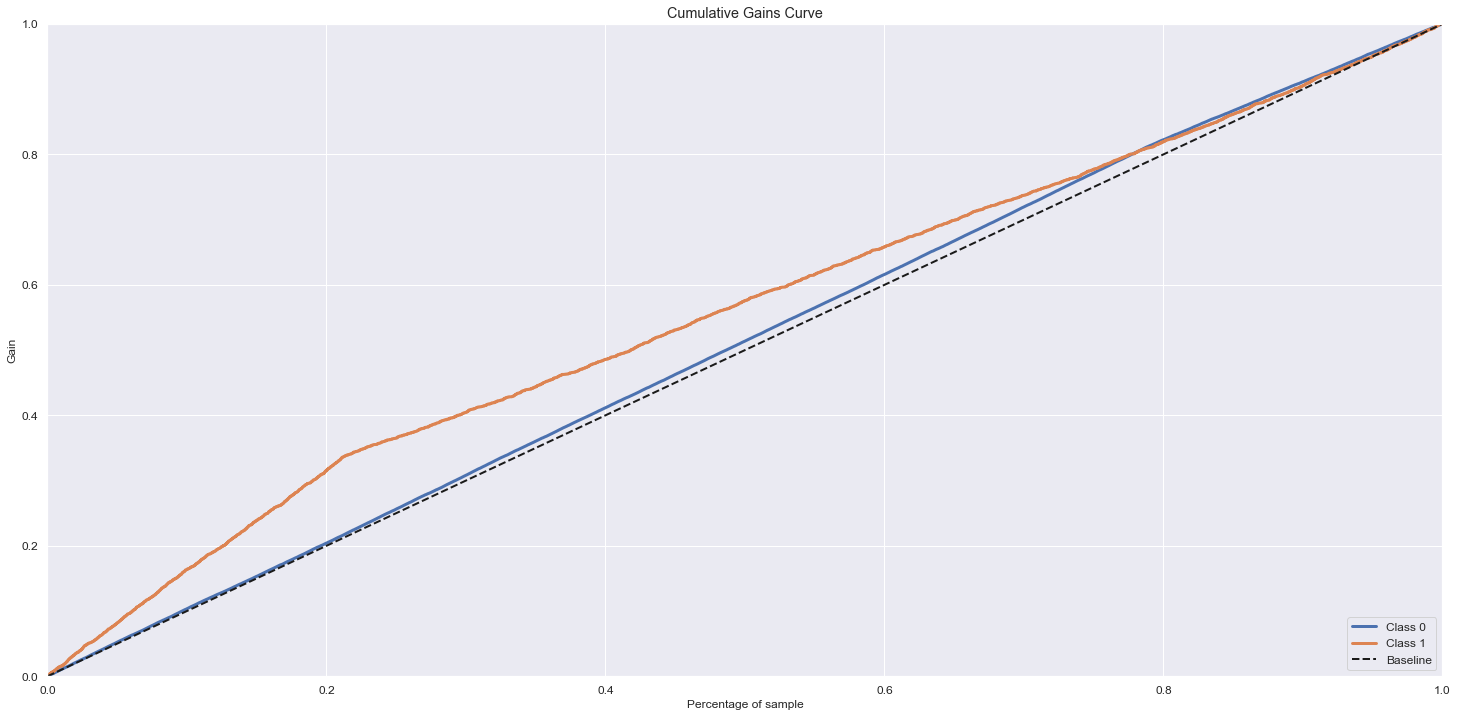

In [414]:
# Acumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );

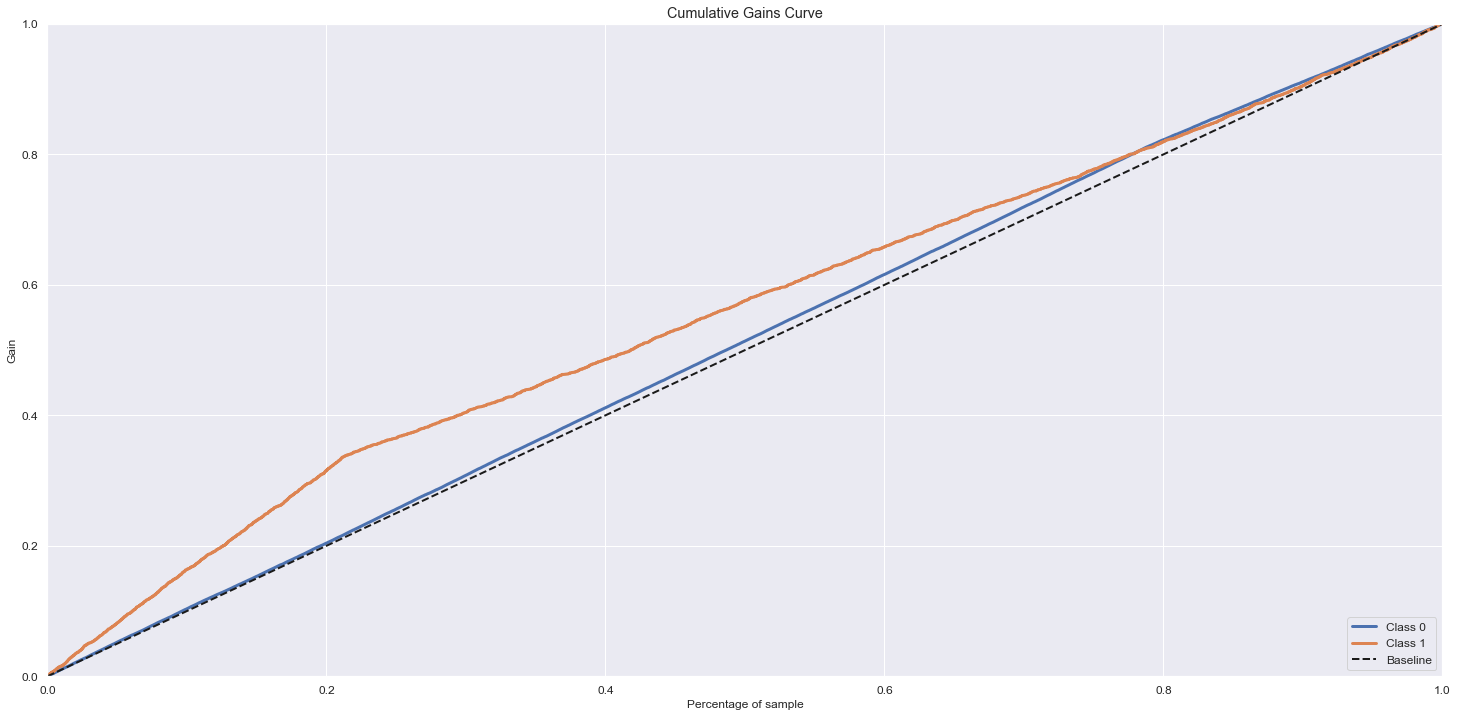

In [416]:
# model definition
lr_model = lm.LogisticRegression( random_state=2 )

# model training
lr_model.fit( x_train, y_train )

# model prediction - the power of model; generalization
yhat_lr = lr_model.predict_proba( x_validation )

# Acumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );